<a href="https://colab.research.google.com/github/HaroonRasheed1903/ai_internship_projects/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression implementation

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


Iteration = 1, Loss = 3724167389.2663674
Iteration = 1, Loss = 1723189192.01758
Iteration = 1, Loss = 827029666.2406669
Iteration = 1, Loss = 425578950.9872261
Iteration = 2, Loss = 245646335.55715257
Iteration = 3, Loss = 164904398.8961534
Iteration = 4, Loss = 128578223.7180098
Iteration = 5, Loss = 112141078.21488805
Iteration = 6, Loss = 104610550.54458919
Iteration = 7, Loss = 101069009.30637339
Iteration = 8, Loss = 99314467.89017585
Iteration = 9, Loss = 98360932.04860288
Iteration = 10, Loss = 97766896.07042189
Iteration = 11, Loss = 97334661.51556742
Iteration = 12, Loss = 96975700.27103731
Iteration = 13, Loss = 96650367.76603203
Iteration = 14, Loss = 96340908.17895444
Iteration = 15, Loss = 96039366.89858785
Iteration = 16, Loss = 95742178.05080041
Iteration = 17, Loss = 95447740.93918625
Iteration = 18, Loss = 95155334.84058708
Iteration = 19, Loss = 94864633.07975918
Iteration = 20, Loss = 94575485.44504419


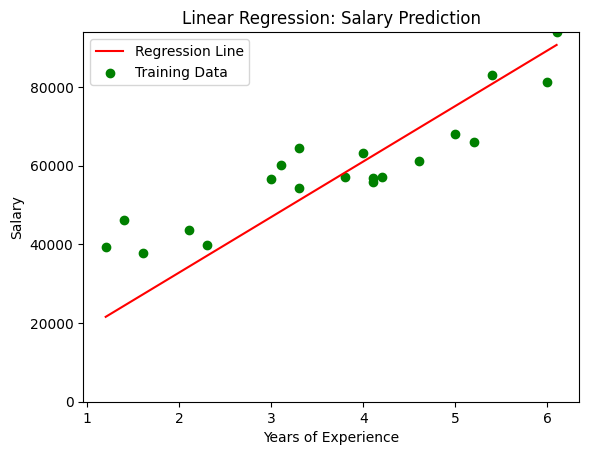

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation
import io

data = pd.read_csv(io.BytesIO(uploaded['Salary_dataset.csv']))

data = data.dropna()

train_input = np.array(data.YearsExperience[0:20]).reshape(-1, 1)
train_output = np.array(data.Salary[0:20]).reshape(-1, 1)

test_input = np.array(data.YearsExperience[20:]).reshape(-1, 1)
test_output = np.array(data.Salary[20:]).reshape(-1, 1)

class LinearRegression:
  def __init__(self):
    self.parameters = {}

  def forward_propagation(self, train_input):
    m = self.parameters['m']
    c = self.parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

  def cost_function(self, predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2)
    return cost

  def backward_propagation(self, train_input, train_output, predictions):
    derivatives = {}
    df = (predictions-train_output)
    dm = 2 * np.mean(np.multiply(train_input, df))
    dc = 2 * np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

  def update_paramters(self, derivatives, learning_rate):
    self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
    self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

  def train(self, train_input, train_output, learning_rate, iters):
    self.parameters['m'] = np.random.uniform(0, 1) * -1
    self.parameters['c'] = np.random.uniform(0, 1) * -1

    self.loss = []

    fig, ax = plt.subplots()
    x_vals = np.linspace(min(train_input), max(train_input), 100)
    line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color = 'red', label = 'Regression Line')
    ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

    ax.set_ylim(0, max(train_output) + 1)

    def update(frame):
      predictions = self.forward_propagation(train_input)
      cost = self.cost_function(predictions, train_output)
      derivatives = self.backward_propagation(train_input, train_output, predictions)
      self.update_paramters(derivatives, learning_rate)
      line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
      self.loss.append(cost)
      print("Iteration = {}, Loss = {}".format(frame + 1, cost))
      return line,

    ani = FuncAnimation(fig, update, frames=iters, interval=500, blit=True)

    # Save the animation (optional in Colab)
    ani.save('salary_regression.gif', writer='pillow')  # 'pillow' is better for Colab

    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.title('Linear Regression: Salary Prediction')
    plt.legend()
    plt.show()

    return self.parameters, self.loss

linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.01, 20)